[Realted course](https://datamentor.ai)

<br>

<br>

<br>


##**Problem Statement**

Scrape all job postings by area from the links given in the file ‘link_by_areas.csv’. For every link, loop through all the job postings by page, collecting all the information for a given posting.

Create an output CSV file with job title, company, experience, salary, location, description, tags associated, function area, posting date, scraping date.

#**Solution**

The task at hand is to build a Python Auto Scraper tool that will scrape data from Naukri job site and save the output as a CSV file which can be used for further analysis.


In order to accomplish this task. I will be using ***Python*** to scrape the required data from the job search site-***Naukri***.

To begin with, the necessary libraries needs to be imported.

**WebDriver**: drives a browser natively, as a user would, either locally or on a remote machine using the Selenium server, marks a leap forward in terms of browser automation.

**Selenium WebDriver**: refers to both the language bindings and the implementations of the individual browser controlling code. This is commonly referred to as just WebDriver.

**Beautiful Soup**: is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree.

**Pandas**: is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. Used for dataframe manupulations.

In [ ]:
#importing the libraries

from selenium import webdriver
import chromedriver_binary
from bs4 import BeautifulSoup
import time
import pandas as pd

In [ ]:
#loading the link_by_areas.csv file

joblinks = pd.read_csv('link_by_areas.csv')
joblinks

,type,link
0,Accounting Jobs,https://www.naukri.com/accounting-jobs?xt=cats...
1,Interior Design Jobs,https://www.naukri.com/interior-design-jobs?xt...
2,Bank Jobs,https://www.naukri.com/bank-jobs?xt=catsrch&qf...
3,Content Writing Jobs,https://www.naukri.com/content-writing-jobs?xt...
4,Consultant Jobs,https://www.naukri.com/consultant-jobs?xt=cats...
5,Engineering Jobs,https://www.naukri.com/engineering-jobs?xt=cat...
6,Export Import Jobs,https://www.naukri.com/export-import-jobs?xt=c...
7,Merchandiser Jobs,https://www.naukri.com/merchandiser-jobs?xt=ca...
8,Security Jobs,https://www.naukri.com/security-jobs?xt=catsrc...
9,HR Jobs,https://www.naukri.com/hr-jobs?xt=catsrch&qf[]=12


#The **URL STRUCTURE**

In order to scrape data from one page to the other, the urls need to be created in such a way that it will automatically adjust to move move from one page to the other.

When we look closely at the **urls**, we can see that all theurls have the domain **https://www.naukri.com/** followed by the job type, then the **page number** and a question mark as shown below. We will need to find a way to make the page number generic in order to be able to navigate through different pages automatically.

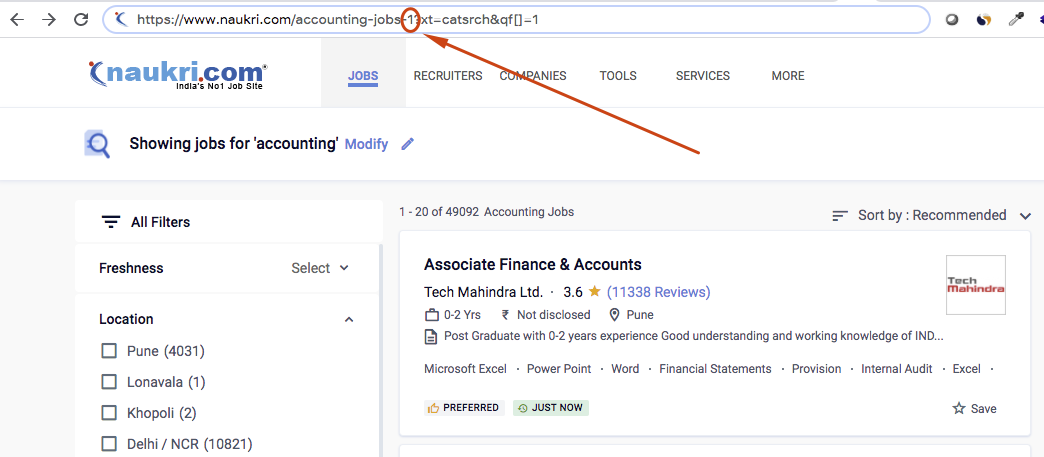

<br>

Lert's first convert our **urls** to a list

In [ ]:
urls = joblinks['link'].tolist()

In [ ]:
urls

['https://www.naukri.com/accounting-jobs?xt=catsrch&qf[]=1',
 'https://www.naukri.com/interior-design-jobs?xt=catsrch&qf[]=2',
 'https://www.naukri.com/bank-jobs?xt=catsrch&qf[]=6',
 'https://www.naukri.com/content-writing-jobs?xt=catsrch&qf[]=5',
 'https://www.naukri.com/consultant-jobs?xt=catsrch&qf[]=9',
 'https://www.naukri.com/engineering-jobs?xt=catsrch&qf[]=21',
 'https://www.naukri.com/export-import-jobs?xt=catsrch&qf[]=10',
 'https://www.naukri.com/merchandiser-jobs?xt=catsrch&qf[]=10',
 'https://www.naukri.com/security-jobs?xt=catsrch&qf[]=45',
 'https://www.naukri.com/hr-jobs?xt=catsrch&qf[]=12',
 'https://www.naukri.com/hotel-jobs?xt=catsrch&qf[]=4',
 'https://www.naukri.com/application-programming-jobs?xt=catsrch&qf[]=24.01',
 'https://www.naukri.com/client-server-jobs?xt=catsrch&qf[]=24.02',
 'https://www.naukri.com/dba-jobs?xt=catsrch&qf[]=24.03',
 'https://www.naukri.com/ecommerce-jobs?xt=catsrch&qf[]=24.12',
 'https://www.naukri.com/erp-jobs?xt=catsrch&qf[]=24.04',
 'h

<br>


In order to make the **urls** generic. We will need use a library called **Yarl**(Yet another URL library). All url parts: scheme, user, password, host, port, path, query and fragment are accessible by yarl properties.

We will use **yarl** to access different parts of the variuos **urls**.



In [ ]:
#in order to use yarl, we need to first install the yarl library
pip install yarl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import yarl  # firsr make sure u have run pip install yarl above
# part = yarl.URL('https://www.naukri.com/business-intelligence-jobs?xt=catsrch&qf[]=81')
# u=part.path_qs

In [ ]:
from yarl import URL  #importing the yarl library
n = [] #an empty set that will contain the job type of the url
for i in urls:
    n.append(URL(i).path) #getting the job type part of the url using yarl property: path
#     print(n)

In [ ]:
#let's see what is contain in 'n'

n

['/accounting-jobs',
 '/interior-design-jobs',
 '/bank-jobs',
 '/content-writing-jobs',
 '/consultant-jobs',
 '/engineering-jobs',
 '/export-import-jobs',
 '/merchandiser-jobs',
 '/security-jobs',
 '/hr-jobs',
 '/hotel-jobs',
 '/application-programming-jobs',
 '/client-server-jobs',
 '/dba-jobs',
 '/ecommerce-jobs',
 '/erp-jobs',
 '/vlsi-jobs',
 '/mainframe-jobs',
 '/middleware-jobs',
 '/mobile-jobs',
 '/network-administrator-jobs',
 '/information-technology-jobs',
 '/testing-jobs',
 '/system-programming-jobs',
 '/edp-jobs',
 '/telecom-software-jobs',
 '/telecom-jobs',
 '/bpo-jobs',
 '/legal-jobs',
 '/marketing-jobs',
 '/packaging-jobs',
 '/pharma-jobs',
 '/maintenance-jobs',
 '/logistics-jobs',
 '/sales-jobs',
 '/secretary-jobs',
 '/corporate-planning-jobs',
 '/site-engineering-jobs',
 '/film-jobs',
 '/teaching-jobs',
 '/airline-jobs',
 '/graphic-designer-jobs',
 '/shipping-jobs',
 '/analytics-jobs',
 '/business-intelligence-jobs']

In [ ]:
m = [] #an empty list that will contain the rest of the url after the job part
for i in urls:
    m.append(URL(i).query_string)  #getting the rest of the url using yarl property: query_string
#     print(m)

In [ ]:
#let's see what is contain in 'm'

m

['xt=catsrch&qf[]=1',
 'xt=catsrch&qf[]=2',
 'xt=catsrch&qf[]=6',
 'xt=catsrch&qf[]=5',
 'xt=catsrch&qf[]=9',
 'xt=catsrch&qf[]=21',
 'xt=catsrch&qf[]=10',
 'xt=catsrch&qf[]=10',
 'xt=catsrch&qf[]=45',
 'xt=catsrch&qf[]=12',
 'xt=catsrch&qf[]=4',
 'xt=catsrch&qf[]=24.01',
 'xt=catsrch&qf[]=24.02',
 'xt=catsrch&qf[]=24.03',
 'xt=catsrch&qf[]=24.12',
 'xt=catsrch&qf[]=24.04',
 'xt=catsrch&qf[]=24.05',
 'xt=catsrch&qf[]=24.13',
 'xt=catsrch&qf[]=24.15',
 'xt=catsrch&qf[]=24.14',
 'xt=catsrch&qf[]=24.06',
 'xt=catsrch&qf[]=24',
 'xt=catsrch&qf[]=24.08',
 'xt=catsrch&qf[]=24.09',
 'xt=catsrch&qf[]=24.11',
 'xt=catsrch&qf[]=24.10',
 'xt=catsrch&qf[]=37',
 'xt=catsrch&qf[]=8',
 'xt=catsrch&qf[]=13',
 'xt=catsrch&qf[]=15',
 'xt=catsrch&qf[]=18',
 'xt=catsrch&qf[]=16',
 'xt=catsrch&qf[]=19',
 'xt=catsrch&qf[]=14',
 'xt=catsrch&qf[]=22',
 'xt=catsrch&qf[]=11',
 'xt=catsrch&qf[]=7',
 'xt=catsrch&qf[]=20',
 'xt=catsrch&qf[]=43',
 'xt=catsrch&qf[]=36',
 'xt=catsrch&qf[]=44',
 'xt=catsrch&qf[]=3',
 

<br>

Now that we have been able to extract the variuos parts of the **urls**, we will sticth them together but this time we will add a placeholder **-{}** after the ***job type part*** of the url.

In [ ]:
gen_urls= []
for i in range(len(n)):

    url = 'https://www.naukri.com/'+n[i]+'-{}?'+m[i] #adding the domain of the url, the job part, the placeholder {} , as well as the rest of the url together
    gen_urls.append(url) #appending our generic url into a list

As seen below, all good. we have the our urls with a placeholder **{}** where we can simply be adding our page numbers to navigate to different pages as we scrape our data.

In [ ]:
gen_urls

['https://www.naukri.com//accounting-jobs-{}?xt=catsrch&qf[]=1',
 'https://www.naukri.com//interior-design-jobs-{}?xt=catsrch&qf[]=2',
 'https://www.naukri.com//bank-jobs-{}?xt=catsrch&qf[]=6',
 'https://www.naukri.com//content-writing-jobs-{}?xt=catsrch&qf[]=5',
 'https://www.naukri.com//consultant-jobs-{}?xt=catsrch&qf[]=9',
 'https://www.naukri.com//engineering-jobs-{}?xt=catsrch&qf[]=21',
 'https://www.naukri.com//export-import-jobs-{}?xt=catsrch&qf[]=10',
 'https://www.naukri.com//merchandiser-jobs-{}?xt=catsrch&qf[]=10',
 'https://www.naukri.com//security-jobs-{}?xt=catsrch&qf[]=45',
 'https://www.naukri.com//hr-jobs-{}?xt=catsrch&qf[]=12',
 'https://www.naukri.com//hotel-jobs-{}?xt=catsrch&qf[]=4',
 'https://www.naukri.com//application-programming-jobs-{}?xt=catsrch&qf[]=24.01',
 'https://www.naukri.com//client-server-jobs-{}?xt=catsrch&qf[]=24.02',
 'https://www.naukri.com//dba-jobs-{}?xt=catsrch&qf[]=24.03',
 'https://www.naukri.com//ecommerce-jobs-{}?xt=catsrch&qf[]=24.12',
 

Confirming below to see if we still have same number of urls as given in original dataset.

In [ ]:
joblinks.shape

(45, 2)

In [ ]:
len(gen_urls)

45

#**Scraping Data From Naukri.Com**

In order to scrape the required data from naukri.com, we will follow a simple two step process:



1.   Define a dataframe which will contain our data
2.   Create a generic python code which will help to extract the data as required.



<br>


**Create a dataframe to contain our scraped data**

In [ ]:
df = pd.DataFrame(columns=['Job_Title','Experience','Company','Scraping_Date','Salary','Location','Tags_Associated','Posting_Date'])





**Create a generic python code to scrape the required data**

In [ ]:

for page in range(1,2):
    for urll in gen_urls[0:1]:
        url = urll.format(page)
        driver = webdriver.Chrome('/Users/mybeast/Downloads/chromedriver')
        driver.get(url)

        time.sleep(5)

        soup = BeautifulSoup(driver.page_source,'html5lib')

        driver.close()




#         print(soup.prettify())
        results = soup.find(class_='list')
        job_elems = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')


        for job_elem in job_elems:


#                     #function area
#             func_results = soup.find('p',class_='jdRightItemValue')
#             if func_results is None:
#                 func_results = 'Not Available'
#                 continue
#             else:
#                 func_area = func_results.text
#                 print(func_area)

            #job title
            Job_Title = job_elem.find('a',class_='title fw500 ellipsis')
            print(Job_Title.text)

            # Experience
            Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
            Exp_span = Exp.find('span',class_='ellipsis fleft fs12 lh16')
            if Exp_span is None:
                continue
            else:
                Experience = Exp_span.text
                print(Experience)



            # Company
            Company = job_elem.find('a',class_='subTitle ellipsis fleft')
            print(Company.text)


            # Date Scraped
            from datetime import date
            today = date.today()
                    # dd/mm/YY
            date_today = today.strftime("%d/%m/%Y")
            print(date_today)


            # Salary
            Sal = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi salary')
            Sal_span = Sal.find('span',class_='ellipsis fleft fs12 lh16')
            if Sal_span is None:
                continue
            else:
                Salary = Sal_span.text
                print(Salary)


            # Location for the job post
            Loc = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi location')
            Loc_exp = Loc.find('span',class_='ellipsis fleft fs12 lh16')
            if Loc_exp is None:
                continue
            else:
                Location = Loc_exp.text
                print(Location)



            #tags

            tags = job_elem.find('li',class_='fleft fs12 grey-text lh16 dot')

            if tags is None:
                continue
            else:
                assoc_tags = tags.text
                print(assoc_tags)




            # Date job Posted
            date = job_elem.find("div",["type br2 fleft grey","type br2 fleft green"])
            date_posted = date.find('span',class_='fleft fw500')
            if date_posted is None:
                continue
            else:
                Posting_Date = date_posted.text
                print(Posting_Date)

            df=df.append({'Job_Title':Job_Title.text,'Experience':Experience,'Company':Company.text,'Scraping_Date':date_today, 'Salary':Salary,'Location':Location,'Tags_Associated':assoc_tags,'Posting_Date':Posting_Date},ignore_index = True)



Accounts Receivable/Payable Executive - With Good Communication Skill
0-2 Yrs
Southern Cross Group India Pvt Ltd
24/04/2021
Not disclosed
Chennai
P
4 Days Ago
Accounts Payable Executive
0-2 Yrs
Super India Tech Mark
24/04/2021
1,25,000 - 2,25,000 PA.
Rohtak
Accounting
9 Days Ago
Accounts Payable Executive
0-2 Yrs
Super India Tech Mark
24/04/2021
1,25,000 - 2,25,000 PA.
Guwahati
Accounting
10 Days Ago
Accounts Executive – Accounts Payable
0-4 Yrs
QAI India Limited
24/04/2021
Not disclosed
New Delhi
P
15 Days Ago
Accounts & Finance Executive

0-5 Yrs
Everfine Management Services 
24/04/2021
3,00,000 - 6,00,000 PA.
Kolkata, Hyderabad/Secunderabad, Mangaluru/Mangalore, Ahmedabad, Chennai, Bangalore/Bengaluru
balance sheet
Just Now
Finance & Accounts executive - Bangalore
0-0 Yrs
RANDSTAD INDIA PVT LTD
24/04/2021
2,00,000 - 3,00,000 PA.
Bangalore Rural, Bangalore/Bengaluru
fresher
2 Days Ago
Accounts Payable  -  Executive / Sr. Executive
5-8 Yrs
Lodha group
24/04/2021
5,50,000 - 7,50,000 PA

#Let's observe the data we have scraped and saved in our pandas dataframe

In [ ]:
df.head()

,Job_Title,Experience,Company,Scraping_Date,Salary,Location,Tags_Associated,Posting_Date
0,Accounts Receivable/Payable Executive - With G...,0-2 Yrs,Southern Cross Group India Pvt Ltd,24/04/2021,Not disclosed,Chennai,P,4 Days Ago
1,Accounts Payable Executive,0-2 Yrs,Super India Tech Mark,24/04/2021,"1,25,000 - 2,25,000 PA.",Rohtak,Accounting,9 Days Ago
2,Accounts Payable Executive,0-2 Yrs,Super India Tech Mark,24/04/2021,"1,25,000 - 2,25,000 PA.",Guwahati,Accounting,10 Days Ago
3,Accounts Executive – Accounts Payable,0-4 Yrs,QAI India Limited,24/04/2021,Not disclosed,New Delhi,P,15 Days Ago
4,Accounts & Finance Executive\n,0-5 Yrs,Everfine Management Services,24/04/2021,"3,00,000 - 6,00,000 PA.","Kolkata, Hyderabad/Secunderabad, Mangaluru/Man...",balance sheet,Just Now


###**Saving the scraped data into a csv file**

In [ ]:
df.to_csv('NaukriJobScraped.csv')

# NB: **Link to my other web scraping work that I have done previously**



1.   [Building Amazon Web Scraper with python](https://colab.research.google.com/drive/1D9wLwJK9TyuQOIMfXw8CSXK7RgfqIGrn?usp=sharing)
2.   [E-commerce webscraping with python](https://colab.research.google.com/drive/1pl6IxlPLTnBMlY_1NjUqMKuMI6NdV5PK?usp=sharing)



In [ ]:
results = soup.find(class_='list')
job_elems = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')

for job_elem in job_elems:
    # URL to apply for the job
    URL = job_elem.find('a',class_='title fw500 ellipsis').get('href')
    print(URL.strip())

https://www.naukri.com/job-listings-senior-interior-designer-in-out-interior-solutions-bangalore-bengaluru-2-to-4-years-100421004178?src=jobsearchDesk&sid=16192425649389210&xp=1&px=1
https://www.naukri.com/job-listings-urgent-requirement-of-interior-designers-in-bangalore-at-livspace-home-interior-design-e-commerce-pvt-ltd-bangalore-bengaluru-3-to-6-years-230421003722?src=jobsearchDesk&sid=16192425649389210&xp=2&px=1
https://www.naukri.com/job-listings-interior-designer-bangalore-home-interior-design-e-commerce-pvt-ltd-bangalore-bengaluru-3-to-7-years-210421002272?src=jobsearchDesk&sid=16192425649389210&xp=3&px=1
https://www.naukri.com/job-listings-interior-designer-super-india-tech-mark-vasai-0-to-2-years-150421603889?src=jobsearchDesk&sid=16192425649389210&xp=4&px=1
https://www.naukri.com/job-listings-interior-designer-home-interior-design-e-commerce-pvt-ltd-thane-navi-mumbai-mumbai-all-areas-3-to-8-years-100421003245?src=jobsearchDesk&sid=16192425649389210&xp=5&px=1
https://www.nauk

In [ ]:
for job_elem in job_elems:
    # Post Title
    Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
    Exp_span = Exp.find('span',class_='ellipsis fleft fs12 lh16')
    if Exp_span is None:
        continue
    else:
        Experience = Exp_span.text
#         print(Experience)
    Job_Title = job_elem.find('a',class_='title fw500 ellipsis')
#     print(Job_Title.text)

    URL = job_elem.find('a',class_='title fw500 ellipsis').get('href')
#     print(URL.strip())

    Company = job_elem.find('a',class_='subTitle ellipsis fleft')
#     print(Company.text)


    from datetime import date
    today = date.today()
            # dd/mm/YY
    date_today = today.strftime("%d/%m/%Y")
#     print(date_today)


#             # Years of experience Required
#     Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
#     Exp_span = Exp.find('span',class_='ellipsis fleft fs12 lh16')
#     if Exp_span is None:
#         continue
#     else:
#         Experience = Exp_span.text
# #         print(Experience)

    Sal = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi salary')
    Sal_span = Sal.find('span',class_='ellipsis fleft fs12 lh16')
    if Sal_span is None:
        continue
    else:
        Salary = Sal_span.text
#         print(Salary)

            # Location for the job post
    Loc = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi location')
    Loc_exp = Loc.find('span',class_='ellipsis fleft fs12 lh16')
    if Loc_exp is None:
        continue
    else:
        Location = Loc_exp.text
#         print(Location)

            # Number of days since job posted
    date = job_elem.find("div",["type br2 fleft grey","type br2 fleft green"])
    date_posted = date.find('span',class_='fleft fw500')
    if date_posted is None:
        continue
    else:
        Posting_Date = date_posted.text
        print(Posting_Date)
  #Appending data to the DataFrame
#     df=df.append({'Job_Title':Job_Title.text,'Tags_Associated':Tags_Associated,'Function_Area':funct_area,'Company':Company.text,'Experience':Experience,'Salary':Salary,'Location':Location,'Posting_Date':Posting_Date,'Scraping_Date':date_today},ignore_index = True)


3,50,000 - 5,50,000 PA.
13 Days Ago
50,000 - 3,00,000 PA.
Today
Not disclosed
2 Days Ago
1,25,000 - 2,25,000 PA.
8 Days Ago
2,00,000 - 5,00,000 PA.
13 Days Ago
2,00,000 - 5,00,000 PA.
3 Days Ago
4,00,000 - 7,00,000 PA.
6 Days Ago
Not disclosed
9 Days Ago
2,00,000 - 5,00,000 PA.
10 Days Ago
Not disclosed
7 Days Ago
Not disclosed
14 Days Ago
1,25,000 - 2,25,000 PA.
4 Days Ago
2,00,000 - more than 3,00,000 PA.
6 Days Ago
1,00,000 - 2,00,000 PA.
7 Days Ago
2,00,000 - 3,75,000 PA.
10 Days Ago
1,25,000 - 2,25,000 PA.
10 Days Ago
1,25,000 - 2,25,000 PA.
11 Days Ago
1,00,000 - 2,00,000 PA.
12 Days Ago
1,25,000 - 2,25,000 PA.
14 Days Ago
2,50,000 - 4,00,000 PA.
5 Days Ago


In [ ]:
for page in range(1,2):
    for urll in gen_urls[:2]:
        url = urll.format(page)
        driver = webdriver.Chrome('/Users/mybeast/Downloads/chromedriver')
        driver.get(url)

        time.sleep(5)

#         soup = BeautifulSoup(driver.page_source,'html5lib')

#         # print(soup.prettify())

#         driver.close()

#         results = soup.find(class_='list')
#         job_elems = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')
# #         print(job_elems)

        soup1 = BeautifulSoup(driver.page_source,'html5lib')
        driver.close()
        soup_results = soup1.find_all('p')
        print(soup_results)
#         obj = soup_results[0]
#         print(obj)

#         parent=obj.find('p','jdRightItemValue')
#         parent(parent.text)

# #         area=parent.find('span','a-offscreen').text

# #         area=soup.findAll('p')
# #     #     funct_area = area.text
# #         print(area)

[<p><span class="noti_Description fullWidth"></span><span class="status"></span></p>, <p><span class="f16 fw500" title="accounting">Showing jobs for 'accounting'</span><span class="quick-search-bar__view__modify-link">Modify <span class="naukicon naukicon-pencil"></span></span></p>, <p class="grey-text lH20 fleft ml-8 txtLbl"><span class="ellipsis fleft" title="Delhi / NCR">Delhi / NCR</span><span class="fleft ml-5">(10808)</span></p>, <p class="grey-text lH20 fleft ml-8 txtLbl"><span class="ellipsis fleft" title="Bangalore/Bengaluru">Bangalore/Bengaluru</span><span class="fleft ml-5">(10260)</span></p>, <p class="grey-text lH20 fleft ml-8 txtLbl"><span class="ellipsis fleft" title="Mumbai (All Areas)">Mumbai (All Areas)</span><span class="fleft ml-5">(8358)</span></p>, <p class="grey-text lH20 fleft ml-8 txtLbl"><span class="ellipsis fleft" title="Mumbai">Mumbai</span><span class="fleft ml-5">(6558)</span></p>, <p class="grey-text lH20 fleft ml-8 txtLbl"><span class="ellipsis fleft" t

In [ ]:
# url = 'https://www.naukri.com/accounting-jobs?xt=catsrch&qf[]=1'
# driver = webdriver.Chrome('/Users/mybeast/Downloads/chromedriver')
# driver.get(url)

# time.sleep(5)

# soup = BeautifulSoup(driver.page_source,'html5lib')

        # print(soup.prettify())

# driver.close()

# results = soup.find(class_='list')
# # print(results)

# job_elems = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')
# print(job_elems)

for job_elem in job_elems:
    desc1 = job_elem.find('div', class_="job-description fs12 grey-text")
#     desc1.text
# #     desc = desc1.find('i',class_="fleft icon-16 lh16 mr-4 naukicon naukicon-desc")
#     print()

# tags = job_elems.find('ul',class_="tags has-description")
# print(tags)

# for job_elem in job_elems:
#     func_area = job_elem.find('li',class_='fleft fs12 grey-text lh16 dot')

#     if func_area is None:
#             continue
#     else:
#         Experience = func_area.text



#     print(area.text)

# #             func_area = area.find('span',class_='ellipsis fleft fs12 lh16')
# #             if func_area is None:
# #                 continue
# #             else:
# #                 Experience = func_area.text












# soup1 = BeautifulSoup(driver.page_source,'html5lib')
# driver.close()
# soup_results = soup1.find('p',class_='jdRightItemValue')
# func_area = soup_results.text
# print(func_area)

# skill=soup1.find_all(class_='key-skill')
# print(skill)
# # print(tags)




# results = soup1.find(class_='list')
# print(results)

# tags_results = soup1.find('div',{'_blank':'chip clickable'})
# print(tags_results)
# # tags=tags_results.find_all('div',{'a':})
# # print(tags)
# # ssp= tags.find_all('a',class_='chip clickable')
# # print(ssp)


 Roles and Responsibilities We are looking for candidates with Accounts background and e...
 Roles and ResponsibilitiesInterested candidates can directly walk-in the mentioned venu...
 Roles and ResponsibilitiesInterested candidates can directly walk-in the mentioned venu...
 Commerce graduate Competencies required for the position 3 years well rounded experienc...
 Intially work from homeGraduates only from finance background students only preferredWe...
 JD is as below :1. Invoices Verification and Processing2. SAP and related payable funct...
 We are looking for energetic Freshers / Accounts Professional possessing 1 to 4 years r...
 Post Graduate / Graduate with prior experience (4 -6 years) of working in a shared serv...
 Roles and Responsibilities Good in accounting concept and process Taking care of day to...
 Education: UG Graduation in Commerce / CA (Qualified) / CA (Inter) Should possess a sta...
 Roles and Responsibilities Knowledge of Bank Reconciliation StatementSupport mo

In [ ]:
df = pd.DataFrame(columns=['Job_Title','Tags_Associated','Function_Area','Company','Experience','Salary','Location','Posting_Date','Scraping_Date'])



In [ ]:

for page in range(1,3):
    for urll in gen_urls[:2]:
        url = urll.format(page)
        driver = webdriver.Chrome('/Users/mybeast/Downloads/chromedriver')
        driver.get(url)

        time.sleep(5)

        soup = BeautifulSoup(driver.page_source,'html5lib')

        # print(soup.prettify())

        driver.close()


        #function area
        func_results = soup.find('p',class_='jdRightItemValue')
        if func_results is None:
            continue
        else:
            func_area = func_results.text
            print(func_area)


        results = soup.find(class_='list')
        job_elems = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')



        #tags
        for job_elem in job_elems:

            tags = job_elem.find('li',class_='fleft fs12 grey-text lh16 dot')

            if tags is None:
                continue
            else:
                assoc_tags = tags.text
                print(assoc_tags)

        # Experience
            Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
            Exp_span = Exp.find('span',class_='ellipsis fleft fs12 lh16')
            if Exp_span is None:
                continue
            else:
                Experience = Exp_span.text
        #         print(Experience)

        #   Job Title
            Job_Title = job_elem.find('a',class_='title fw500 ellipsis')
            print(Job_Title.text)


# #             URL = job_elem.find('a',class_='title fw500 ellipsis').get('href')
# #         #     print(URL.strip())


            # Company Name
            Company = job_elem.find('a',class_='subTitle ellipsis fleft')
            print(Company.text)



            #Job description
            desc = job_elem.find('div', class_="job-description fs12 grey-text")


            #Job Scraped Date
            from datetime import date
            today = date.today()
                    # dd/mm/YY
            date_today = today.strftime("%d/%m/%Y")
        #     print(date_today)


            # Years of experience Required
            Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
            Exp_span = Exp.find('span',class_='ellipsis fleft fs12 lh16')
            if Exp_span is None:
                continue
            else:
                Experience = Exp_span.text
                print(Experience)


            # Salary
            Sal = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi salary')
            Sal_span = Sal.find('span',class_='ellipsis fleft fs12 lh16')
            if Sal_span is None:
                continue
            else:
                Salary = Sal_span.text
        #         print(Salary)



            # Location
            Loc = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi location')
            Loc_exp = Loc.find('span',class_='ellipsis fleft fs12 lh16')
            if Loc_exp is None:
                continue
            else:
                Location = Loc_exp.text
        #         print(Location)



            #Job Post Date
            date = job_elem.find("div",["type br2 fleft grey","type br2 fleft green"])
            date_posted = date.find('span',class_='fleft fw500')
            if date_posted is None:
                continue
            else:
                Posting_Date = date_posted.text
                print(Posting_Date)


    #         # Appending data to the DataFrame
            df=df.append({'Job_Title':Job_Title.text,'Tags_Associated':assoc_tags,'Function_Area':func_area,'Company':Company.text,'Experience':Experience,'Salary':Salary,'Location':Location,'Posting_Date':Posting_Date,'Scraping_Date':date_today},ignore_index = True)


In [ ]:
df1 = pd.DataFrame(columns=['Title','Company','Ratings','Reviews','Experience','Salary','Location','Job_Post_History','URL','Scraping_Date'])

In [ ]:
for page in range(1,3):
    for urll in gen_urls[:2]:
        url = urll.format(page)
        driver = webdriver.Chrome('/Users/mybeast/Downloads/chromedriver')
        driver.get(url)

        time.sleep(5)

        soup = BeautifulSoup(driver.page_source,'html5lib')

        # print(soup.prettify())

        driver.close()


        #function area
        func_results = soup.find('p',class_='jdRightItemValue')
        if func_results is None:
            continue
        else:
            func_area = func_results.text
            print(func_area)


        results = soup.find(class_='list')
        job_elems = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')

        for job_elem in job_elems:

            # URL to apply for the job
            URL = job_elem.find('a',class_='title fw500 ellipsis').get('href')
        #     print(URL.strip())

            # Post Title
            Title = job_elem.find('a',class_='title fw500 ellipsis')

            # Company Name
            Company = job_elem.find('a',class_='subTitle ellipsis fleft')

            # Ratings
            rating_span = job_elem.find('span',class_='starRating fleft dot')
            if rating_span is None:
                continue
            else:
                Ratings = rating_span.text

            # Reviews Counts
            Review_span = job_elem.find('a',class_='reviewsCount ml-5 fleft blue-text')
            if Review_span is None:
                continue
            else:
                Reviews = Review_span.text



            #Job Scraped Date
            from datetime import date
            today = date.today()
                    # dd/mm/YY
            date_today = today.strftime("%d/%m/%Y")
        #     print(date_today)



            # Years of experience Required
            Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
            Exp_span = Exp.find('span',class_='ellipsis fleft fs12 lh16')
            if Exp_span is None:
                continue
            else:
                Experience = Exp_span.text

            # Salary offered for the job
            Sal = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi salary')
            Sal_span = Sal.find('span',class_='ellipsis fleft fs12 lh16')
            if Sal_span is None:
                continue
            else:
                Salary = Sal_span.text

            # Location for the job post
            Loc = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi location')
            Loc_exp = Loc.find('span',class_='ellipsis fleft fs12 lh16')
            if Loc_exp is None:
                continue
            else:
                Location = Loc_exp.text

            # Number of days since job posted
            Hist = job_elem.find("div",["type br2 fleft grey","type br2 fleft green"])
            Post_Hist = Hist.find('span',class_='fleft fw500')
            if Post_Hist is None:
                continue
            else:
                Post_History = Post_Hist.text

        #   Appending data to the DataFrame
            df1=df1.append({'URL':URL,'Title':Title.text,'Company':Company.text,'Ratings':Ratings,'Reviews':Reviews,'Scraping_Date':date_today,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)


In [ ]:
# for page in range(1,2):
#     url = "https://www.naukri.com/financial-analyst-jobs-in-mumbai-{}?k=financial%20analyst&l=mumbai".format(page)
for page in range(1,2):
    for urll in gen_urls[0:2]:
        url = urll.format(page)
        driver = webdriver.Chrome('/Users/mybeast/Downloads/chromedriver')
        driver.get(url)


        time.sleep(10)

        soup = BeautifulSoup(driver.page_source,'html5lib')

        # print(soup.prettify())

        driver.close()

        results = soup.find(class_='list')
        job_elems = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')

        for job_elem in job_elems:

            # URL to apply for the job
            URL = job_elem.find('a',class_='title fw500 ellipsis').get('href')
#             print(URL.strip())



            tags=soup.find('div',class_='key-skills')
            if tags is None:
                continue
            else:
                Tags_Associated = tags.text
                print(Tags_Associated)

#             area=job_elem.find(class_='jgRightItemValue')
#             funct_area = area.text

#             from datetime import date
#             today = date.today()
#             # dd/mm/YY
#             date_today = today.strftime("%d/%m/%Y")


#             # Post Title
#             Title = job_elem.find('a',class_='title fw500 ellipsis')

#             # Company Name
#             Company = job_elem.find('a',class_='subTitle ellipsis fleft')

# #             # Ratings
# #             rating_span = job_elem.find('span',class_='starRating fleft dot')
# #             if rating_span is None:
# #                 continue
# #             else:
# #                 Ratings = rating_span.text

# #             # Reviews Counts
# #             Review_span = job_elem.find('a',class_='reviewsCount ml-5 fleft blue-text')
# #             if Review_span is None:
# #                 continue
# #             else:
# #                 Reviews = Review_span.text

#             # Years of experience Required
#             Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
#             Exp_span = Exp.find('span',class_='ellipsis fleft fs12 lh16')
#             if Exp_span is None:
#                 continue
#             else:
#                 Experience = Exp_span.text

#             # Salary offered for the job
#             Sal = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi salary')
#             Sal_span = Sal.find('span',class_='ellipsis fleft fs12 lh16')
#             if Sal_span is None:
#                 continue
#             else:
#                 Salary = Sal_span.text

#             # Location for the job post
#             Loc = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi location')
#             Loc_exp = Loc.find('span',class_='ellipsis fleft fs12 lh16')
#             if Loc_exp is None:
#                 continue
#             else:
#                 Location = Loc_exp.text

#             # Number of days since job posted
#             Hist = job_elem.find("div",["type br2 fleft grey","type br2 fleft green"])
#             Post_Hist = Hist.find('span',class_='fleft fw500')
#             if Post_Hist is None:
#                 continue
#             else:
#                 Post_History = Post_Hist.text

#         #   Appending data to the DataFrame
#             df1=df1.append({'URL':URL,'Job_Title':Title.text,'Company':Company.text,'Tags_Associated':Tags_Associated,'Function_Area':funct_area,'Scraping_Date':date_today,'Experience':Experience,'Salary':Salary,'Location':Location,'Posting_Date':Post_History},ignore_index = True)

